In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001087456"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001087456
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,UNITED BANCSHARES INC/OH
Ticker,UBOH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,12.0,1.930000e+01,3.566776e+00,14.49,16.245,18.695,22.415,25.82
interest income,14.0,6.645929e+06,1.431697e+06,4834000.00,5528750.000,6282000.000,7733750.000,8986000.00
net income,14.0,1.158143e+06,3.464592e+05,763000.00,912000.000,1061000.000,1372500.000,1814000.00
net interest income,14.0,4.875143e+06,9.297880e+05,3707000.00,4245250.000,4795000.000,5140250.000,6935000.00
provision for loan losses,13.0,2.357692e+05,4.276722e+05,-400000.00,0.000,100000.000,275000.000,1275000.00


# Plots

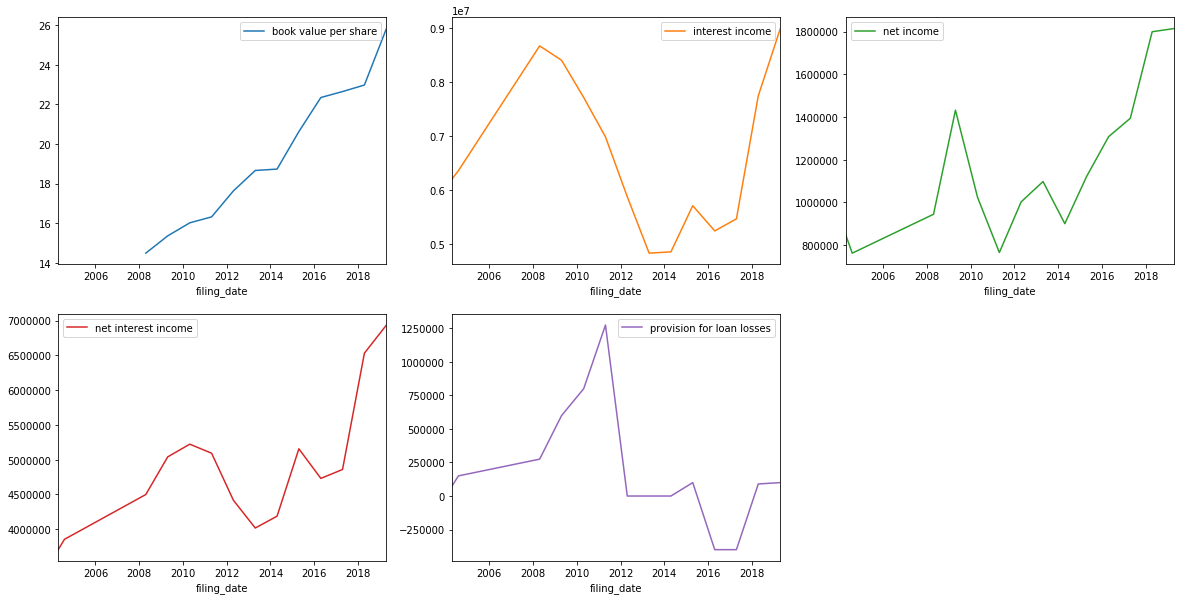

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001087456 book value per share       2004Q1 to 2007Q4: 16 periods  missing   
           book value per share        2008Q2 to 2008Q4: 3 periods  missing   
           book value per share        2009Q2 to 2009Q4: 3 periods  missing   
           book value per share        2010Q2 to 2010Q4: 3 periods  missing   
           book value per share        2011Q2 to 2011Q4: 3 periods  missing   
           book value per share        2012Q2 to 2012Q4: 3 periods  missing   
           book value per share        2013Q2 to 2013Q4: 3 periods  missing   
           book value per share        2014Q2 to 2014Q4: 3 periods  missing   
           book value per share        2015Q2 to 2015Q4: 3 periods  missing   
           book value per share        2016Q2 to 2016Q4: 3 periods  missing   
           book value per share        2017Q2 to 2017Q4: 3 periods  missing   
           book value per share        2018Q2 to 2018Q4: 3 periods  missing   
           interest income            2004Q3 to 2007Q4: 14 periods  missing   
           interest income             2008Q2 to 2008Q4: 3 periods  missing   
           interest income             2009Q2 to 2009Q4: 3 periods  missing   
           interest income             2010Q2 to 2010Q4: 3 periods  missing   
           interest income             2011Q2 to 2011Q4: 3 periods  missing   
           interest income             2012Q2 to 2012Q4: 3 periods  missing   
           interest income             2013Q2 to 2013Q4: 3 periods  missing   
           interest income             2014Q2 to 2014Q4: 3 periods  missing   
           interest income             2015Q2 to 2015Q4: 3 periods  missing   
           interest income             2016Q2 to 2016Q4: 3 periods  missing   
           interest income             2017Q2 to 2017Q4: 3 periods  missing   
           interest income             2018Q2 to 2018Q4: 3 periods  missing   
           net income                 2004Q3 to 2007Q4: 14 periods  missing   
           net income                  2008Q2 to 2008Q4: 3 periods  missing   
           net income                  2009Q2 to 2009Q4: 3 periods  missing   
           net income                  2010Q2 to 2010Q4: 3 periods  missing   
           net income                  2011Q2 to 2011Q4: 3 periods  missing   
           net income                  2012Q2 to 2012Q4: 3 periods  missing   
           net income                  2013Q2 to 2013Q4: 3 periods  missing   
           net income                  2014Q2 to 2014Q4: 3 periods  missing   
           net income                  2015Q2 to 2015Q4: 3 periods  missing   
           net income                  2016Q2 to 2016Q4: 3 periods  missing   
           net income                  2017Q2 to 2017Q4: 3 periods  missing   
           net income                  2018Q2 to 2018Q4: 3 periods  missing   
           net interest income        2004Q3 to 2007Q4: 14 periods  missing   
           net interest income         2008Q2 to 2008Q4: 3 periods  missing   
           net interest income         2009Q2 to 2009Q4: 3 periods  missing   
           net interest income         2010Q2 to 2010Q4: 3 periods  missing   
           net interest income         2011Q2 to 2011Q4: 3 periods  missing   
           net interest income         2012Q2 to 2012Q4: 3 periods  missing   
           net interest income         2013Q2 to 2013Q4: 3 periods  missing   
           net interest income         2014Q2 to 2014Q4: 3 periods  missing   
           net interest income         2015Q2 to 2015Q4: 3 periods  missing   
           net interest income         2016Q2 to 2016Q4: 3 periods  missing   
           net interest income         2017Q2 to 2017Q4: 3 periods  missing   
           net interest income         2018Q2 to 2018Q4: 3 periods  missing   
           provision for loan losses  2004Q3 to 2007Q4: 14 periods  missing   
           provision for loan l

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()